In [152]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [153]:
car_data=pd.read_csv('C:/Users/tanji/Desktop/data science/naan mudhalvan/assignmet2/car data.csv')
car_dekho=pd.read_csv('C:/Users/tanji/Desktop/data science/naan mudhalvan/assignmet2/CAR DETAILS FROM CAR DEKHO.csv')

In [154]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [155]:
car_dekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [156]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [157]:
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [158]:
car_data.Selling_Price=(car_data.Selling_Price*10000).astype(np.int64)   #converting to int64
car_data.drop(['Present_Price'],axis=1,inplace=True)
car_data.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,33500,27000,Petrol,Dealer,Manual,0
1,sx4,2013,47500,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,72500,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,28500,5200,Petrol,Dealer,Manual,0
4,swift,2014,46000,42450,Diesel,Dealer,Manual,0


In [159]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
car_dekho['owner']=encoder.fit_transform(car_dekho['owner'])   #encoding owner column
car_dekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2


In [160]:
car_dekho.rename(columns={    #renaming columns for conactenation
    'name':'Car_Name',
    'year':'Year',
    'selling_price':'Selling_Price',
    'km_driven':'Kms_Driven',
    'fuel':'Fuel_Type',
    'seller_type':'Seller_Type',
    'transmission':'Transmission',
    'owner':'Owner'
},inplace=True)

In [161]:
car=pd.concat([car_data,car_dekho])
car

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,33500,27000,Petrol,Dealer,Manual,0
1,sx4,2013,47500,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,72500,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,28500,5200,Petrol,Dealer,Manual,0
4,swift,2014,46000,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,2
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,0


In [162]:
car_data.shape[0]+car_dekho.shape[0]   #sum of car_data and car_dekho matches the new car dataframe

4641

In [163]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Visualization

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

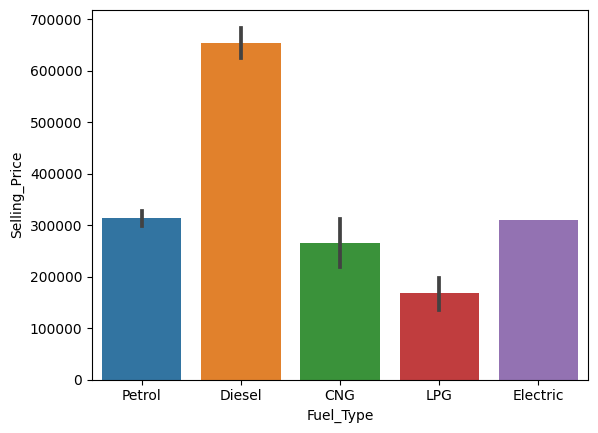

In [164]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car)

<Axes: xlabel='Fuel_Type', ylabel='count'>

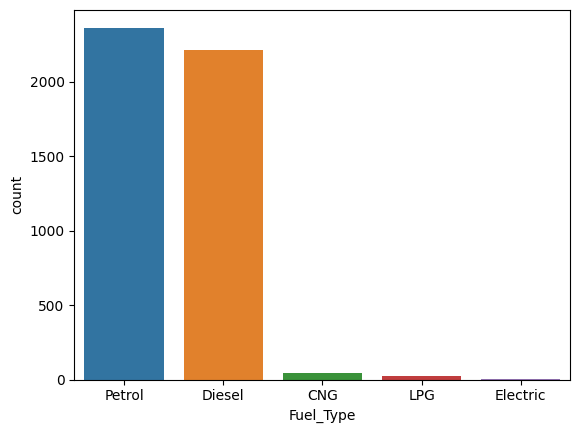

In [165]:
sns.countplot(x='Fuel_Type',data=car)

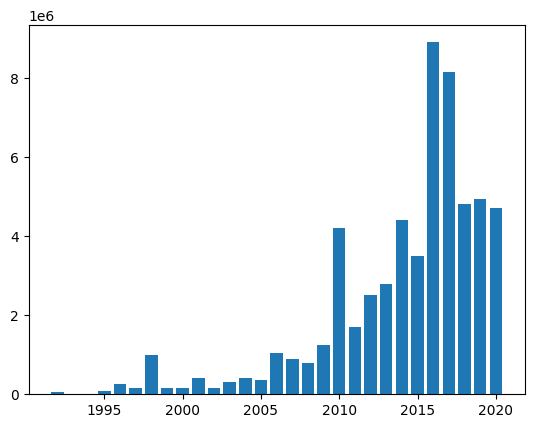

In [166]:
plt.bar(car.Year, car.Selling_Price)
plt.show()

<Axes: xlabel='Year', ylabel='Kms_Driven'>

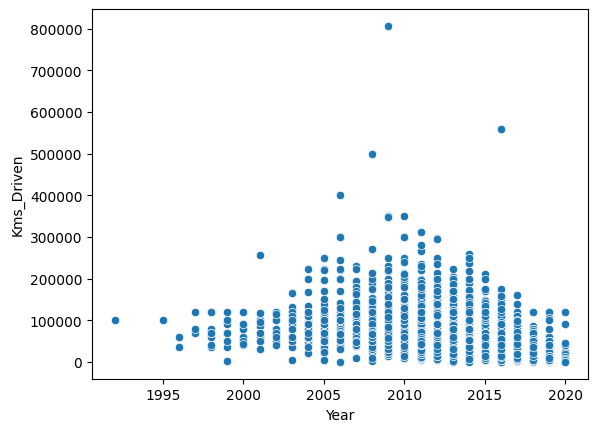

In [167]:
sns.scatterplot(x='Year',y='Kms_Driven',data=car)

# Data Processing

In [168]:
car['Fuel_Type']=encoder.fit_transform(car['Fuel_Type'])
car['Seller_Type']=encoder.fit_transform(car['Seller_Type'])
car['Transmission']=encoder.fit_transform(car['Transmission'])

In [169]:
car

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,33500,27000,4,0,1,0
1,sx4,2013,47500,43000,1,0,1,0
2,ciaz,2017,72500,6900,4,0,1,0
3,wagon r,2011,28500,5200,4,0,1,0
4,swift,2014,46000,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0


# Train test split

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
car.shape

(4641, 8)

In [172]:
X=car.drop(['Selling_Price','Car_Name'], axis=1)
X

,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,27000,4,0,1,0
1,2013,43000,1,0,1,0
2,2017,6900,4,0,1,0
3,2011,5200,4,0,1,0
4,2014,42450,1,0,1,0
...,...,...,...,...,...,...
4335,2014,80000,1,1,1,2
4336,2014,80000,1,1,1,2
4337,2009,83000,4,1,1,2
4338,2016,90000,1,1,1,0


In [173]:
y=car.Selling_Price
y

0        33500
1        47500
2        72500
3        28500
4        46000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4641, dtype: int64

In [174]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [175]:
x_train.shape

(3480, 6)

In [177]:
x_test.shape

(1161, 6)